In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np

import os
import sys
__file__ = './'
sys.path.append(os.path.abspath(os.path.join(os.path.dirname(__file__), '..')))

# os.path.dirname(__file__)获取当前文件的绝对路径
# os.path.join(xx,'..')在后面追加..，相当于进入上一级目录
# os.path.abspath(xx)获取绝对路径
# sys.path.append()将其加入系统路径当中

import MSA
import LINK

In [2]:
# read data
my_link = pd.read_excel(r'D:\004_PhD_Dissertation\Paper_Code\Part3\input_network\small_net.xlsx', sheet_name='link_info')
my_link['I'] = 0
my_node = pd.read_excel(r'D:\004_PhD_Dissertation\Paper_Code\Part3\input_network\small_net.xlsx', sheet_name='node_info')
my_link['name'] = my_link['from'].astype('str') +'-'+ my_link['to'].astype('str')
my_demand = pd.read_excel(r'D:\004_PhD_Dissertation\Paper_Code\Part3\input_network\small_net.xlsx', sheet_name='demand_info')
print(my_demand)

# set parameter
origin_zone = ['r1']
destination_zone = ['s1']
theta_1 = 1# path
theta_2 = 0.5 # mode
miu_in = 25
miu_out = 50
# lamda_0_hailing = 2 #2 RMB/minute
lamda_0_PR = 30 # RMB
lamda_0_transit = 5
N_hailing = 500
lamda_0_auto = LINK.compute_lamda_0_auto(fuel_consumption=8.5)

fee_rate =np.arange(0, 201, 10)
df = []
for lamda_0_hailing in fee_rate:
    result = MSA.assignment(my_link= my_link, my_node= my_node, my_demand= my_demand,
                        origin_zone= origin_zone, destination_zone= destination_zone,
                        miu_in= miu_in, miu_out= miu_out,
                        lamda_0_auto= lamda_0_auto,
                        lamda_0_hailing= lamda_0_hailing/60,
                        lamda_0_transit= lamda_0_transit,
                        lamda_0_PR= lamda_0_PR,
                        theta_1= theta_1, theta_2= theta_2,
                        N_hailing= N_hailing, A=2, maximum_iter=300)
    df.append(result)

# path_flow
path_1_flow = [df[i][2].tail(4).iloc[0]['path_flow'] for i in range(len(df))]
path_2_flow = [df[i][2].tail(4).iloc[1]['path_flow'] for i in range(len(df))]
path_3_flow = [df[i][2].tail(4).iloc[2]['path_flow'] for i in range(len(df))]
path_4_flow = [df[i][2].tail(4).iloc[3]['path_flow'] for i in range(len(df))]

# path_duration
path_1_duration = [df[i][2].tail(4).iloc[0]['path_duration'] for i in range(len(df))]
path_2_duration = [df[i][2].tail(4).iloc[1]['path_duration'] for i in range(len(df))]
path_3_duration = [df[i][2].tail(4).iloc[2]['path_duration'] for i in range(len(df))]
path_4_duration = [df[i][2].tail(4).iloc[3]['path_duration'] for i in range(len(df))]

# path_cost
path_1_cost = [abs(df[i][2].tail(4).iloc[0]['path_cost']) for i in range(len(df))]
path_2_cost = [abs(df[i][2].tail(4).iloc[1]['path_cost']) for i in range(len(df))]
path_3_cost = [abs(df[i][2].tail(4).iloc[2]['path_cost']) for i in range(len(df))]
path_4_cost = [abs(df[i][2].tail(4).iloc[3]['path_cost']) for i in range(len(df))]

# convert to dataframe
dfx = pd.DataFrame({
        'fare_rate': fee_rate,
        'path_1_flow': path_1_flow,
        'path_2_flow': path_2_flow,
        'path_3_flow': path_3_flow,
        'path_4_flow': path_4_flow,
        'path_1_cost': path_1_cost,
        'path_2_cost': path_2_cost,
        'path_3_cost': path_3_cost,
        'path_4_cost': path_4_cost,
        'path_1_duration': path_1_duration,
        'path_2_duration': path_2_duration,
        'path_3_duration': path_3_duration,
        'path_4_duration': path_4_duration,})

dfx['total_cost'] = dfx['path_1_flow'] * dfx['path_1_cost'] + dfx['path_2_flow'] * dfx['path_2_cost'] + dfx['path_3_flow'] * dfx['path_3_cost'] + dfx['path_4_flow'] * dfx['path_4_cost']

  OD_pair  demand
0   r1-s1    1000
0.6517
['path-1', 'path-2', 'path-3', 'path-4']
['auto', 'P&R', 'transit', 'R&T']
Iteration = 1, gap = 1.3403711843802788,
the number of idle_hailing:500.0
Iteration = 2, gap = 9.819314235938595,
the number of idle_hailing:371.42555736353023
Iteration = 3, gap = 4.50156497951729,
the number of idle_hailing:363.372123380604
Iteration = 4, gap = 2.914906545620525,
the number of idle_hailing:362.48780320232237
Iteration = 5, gap = 2.1496983800532763,
the number of idle_hailing:362.24798949534363
Iteration = 6, gap = 1.699324744588104,
the number of idle_hailing:362.1165204552805
Iteration = 7, gap = 1.4030487209063882,
the number of idle_hailing:362.02699321049613
Iteration = 8, gap = 1.1935854585429275,
the number of idle_hailing:361.9613934861287
Iteration = 9, gap = 1.0377942024565738,
the number of idle_hailing:361.9112419533669
Iteration = 10, gap = 0.9174703762824536,
the number of idle_hailing:361.8716872285665
Iteration = 11, gap = 0.82179064406

In [3]:
dfx

,fare_rate,path_1_flow,path_2_flow,path_3_flow,path_4_flow,path_1_cost,path_2_cost,path_3_cost,path_4_cost,path_1_duration,path_2_duration,path_3_duration,path_4_duration,total_cost
0,0,249.597374,235.438491,258.167566,256.796569,103.980965,159.034151,80.239313,83.738282,33.888051,123.098394,144.145780,127.911004,105615.028130
1,10,249.805978,235.613117,258.446260,256.134645,104.117846,159.118086,80.225907,86.216746,33.932661,123.093443,144.113606,127.866047,106316.749781
2,20,250.007164,235.828659,258.708298,255.455879,104.262453,159.211645,80.212930,88.695653,33.979789,123.092994,144.082462,127.822312,107022.605776
3,30,250.204444,236.040089,258.965465,254.790002,104.404627,159.303688,80.200220,91.174987,34.026125,123.092671,144.051957,127.779456,107724.120743
4,40,250.397981,236.247633,259.218042,254.136343,104.544480,159.394287,80.187766,93.654728,34.071704,123.092472,144.022067,127.737440,108421.435854
5,50,250.587669,236.451050,259.465621,253.495659,104.681883,159.483346,80.175572,96.134890,34.116484,123.092380,143.992801,127.696291,109114.575484
6,60,250.773643,236.650541,259.708496,252.867320,104.816929,159.570927,80.163629,98.615455,34.160496,123.092393,143.964137,127.655974,109803.670445
7,70,250.956046,236.846321,259.946982,252.250650,104.949720,159.657099,80.151928,101.096407,34.203774,123.092511,143.936056,127.616455,110488.849551
8,80,251.134759,237.038132,260.180646,251.646462,105.080117,159.741759,80.140475,103.577760,34.246271,123.092718,143.908568,127.577762,111170.135428
9,90,251.310014,237.226346,260.410054,251.053585,105.208306,159.825034,80.129256,106.059486,34.288049,123.093020,143.881642,127.539841,111847.687838


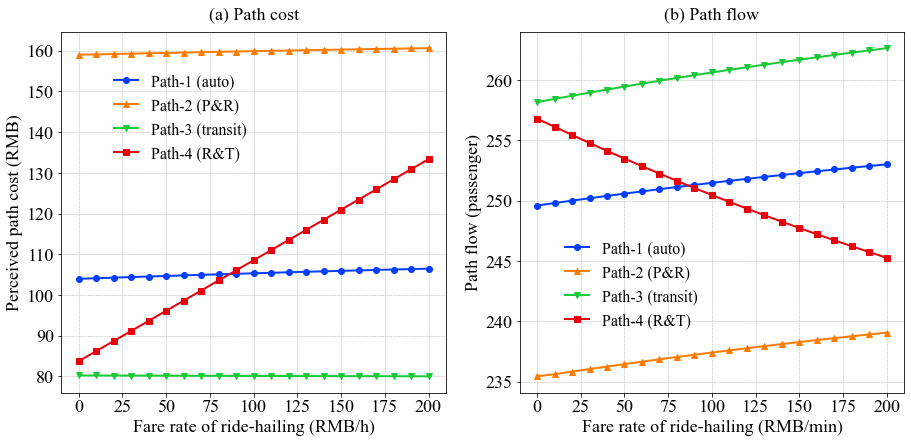

In [39]:
import seaborn as sns
sns.set_palette("bright", 10)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 18

fig = plt.figure(figsize=(13,6.5))

ax = plt.subplot(1,2,1)
ax.grid(ls = '--', lw = 0.5, zorder = 0)
ax.plot(dfx['fare_rate'], dfx['path_1_cost'], '-', lw=2, marker='o',label='Path-1 (auto)')
ax.plot(dfx['fare_rate'], dfx['path_2_cost'], '-', lw=2, marker='^',label='Path-2 (P&R)')
ax.plot(dfx['fare_rate'], dfx['path_3_cost'], '-', lw=2, marker='v',label='Path-3 (transit)')
ax.plot(dfx['fare_rate'], dfx['path_4_cost'], '-', lw=2, marker='s',label='Path-4 (R&T)')
ax.set_xlabel('Fare rate of ride-hailing (RMB/h)')
ax.set_ylabel('Perceived path cost (RMB)')
ax.legend(loc='best', fontsize=16, frameon=False, handlelength=1.5,bbox_to_anchor = (0.1,0.6)) #,bbox_to_anchor = (0.6,0.4)
ax.set_title('(a) Path cost', fontsize=18, loc='center', y=1.02)
ax.set_xticks(np.arange(0, 210,25))

ax = plt.subplot(1,2,2)
ax.grid(ls = '--', lw = 0.5, zorder = 0)
ax.plot(dfx['fare_rate'], dfx['path_1_flow'], '-', lw=2, marker='o',label='Path-1 (auto)')
ax.plot(dfx['fare_rate'], dfx['path_2_flow'], '-', lw=2, marker='^',label='Path-2 (P&R)')
ax.plot(dfx['fare_rate'], dfx['path_3_flow'], '-', lw=2, marker='v',label='Path-3 (transit)')
ax.plot(dfx['fare_rate'], dfx['path_4_flow'], '-', lw=2, marker='s',label='Path-4 (R&T)')
ax.set_xlabel('Fare rate of ride-hailing (RMB/min)')
ax.set_ylabel('Path flow (passenger)')
ax.legend(loc='best', fontsize=16, frameon=False, handlelength=1.5, bbox_to_anchor = (0.5,0.3),)  
ax.set_title('(b) Path flow', fontsize=18, loc='center', y=1.02)
ax.set_xticks(np.arange(0, 210,25))

plt.tight_layout()
plt.show()